# Here I will simply build a classifier that detects the presence of a red ball or not in the training imagaes.
    - First build classifier
    - Then try to do the sliding window thing.
    - I think the purpose of sliding window is so we know the new location of the ball. E.g. If we find ball in top right then move in that direction.

In [1]:
# imports
import os
import numpy as np
from PIL import Image   # https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf

In [2]:
# Define dirs
pos_img_dir = 'TrainingImages/positives/'
neg_img_dir = 'TrainingImages/negatives/'

In [3]:
# Follow https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
# Official https://www.tensorflow.org/tutorials/images/cnn


In [4]:
# go through negatives

neg_images = []
neg_labels = np.zeros( len( os.listdir(neg_img_dir) ) )

for filename in os.listdir(neg_img_dir):
    neg_images.append(np.array(Image.open(neg_img_dir + filename))/255 )  # Normal

#plt.imshow(neg_images[0])
np.shape(neg_images)

(2600, 51, 51, 3)

In [5]:
# go through positives

pos_images = []
pos_labels = np.ones( len( os.listdir(pos_img_dir) ) )

for filename in os.listdir(pos_img_dir):
    pos_images.append(np.array(Image.open(pos_img_dir + filename))/255 ) 

#plt.imshow(pos_images[0])
np.shape(pos_images)

(308, 51, 51, 3)

In [6]:
type(pos_images[0])
X = np.concatenate((neg_images, pos_images))

In [7]:
# Now weve got data in array form we can split into test and train data?
# With full colour images

X = np.concatenate((neg_images, pos_images))
y = np.concatenate((neg_labels, pos_labels))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=300,
                                                    shuffle=True)

# Maybe TODO One-Hot-Encode CNN labels? Does it matter?
#Prove test and train data is split correctly
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train[0].shape

(2326, 51, 51, 3)
(2326,)
(582, 51, 51, 3)
(582,)


(51, 51, 3)

In [8]:
# Multiclass CNN Architecture from 
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(51, 51, 3))) # Or input_shape=(X.shape[1:]) to get inshape
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
#model.add(layers.Dense(2)) # If activation function is used on last layer then accuracy will only be 0.9 not 0.99  
# Keras Documentation:
# activation: Activation function to use (see activations). 
# If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

model.summary()

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1982528   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 2,002,050
Trainable params: 2,002,050
Non-trainable params: 0
______________________________________________

In [23]:
# Binary Classification CNN Architecture from https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(51, 51, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Only a single Conv layer
# Rationale is that there are no higher levels or complicated features to the detection problem.
# Probably detecting the ball as a solid object of red colour, nothing more complicated than that.

model.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))  # Prevent overfitting
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 49, 49, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 49, 49, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1179712   
_________________________________________________________________
activation_19 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [58]:
dave = model.predict(X_test)
# compare with y_test in explorer

In [59]:
X_test.shape

(582, 51, 51, 3)

In [30]:
# Get first image to classify

import PacMan_functionality as PacMan

# Initialise game
global_cloud, spheres_collected = PacMan.startup_scene()
# Create current camera position and angle
position = np.zeros([3])
angle = np.zeros([3])

# Obtain image and associated maps
image, map1, map2, map3, map4 = PacMan.project_pointcloud_image(global_cloud, angle, position)

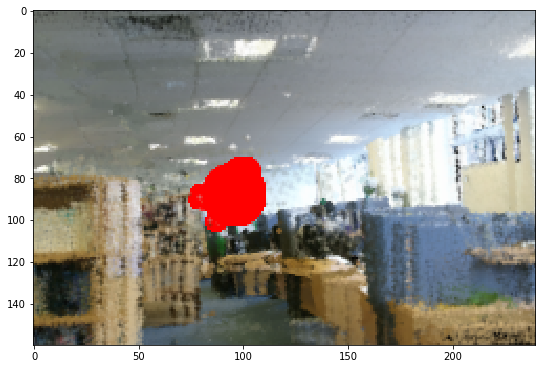

In [60]:
type(image)
np.shape(image)
plt.imshow(image)

In [89]:
print(image[0:51,0:51,:].shape)
print(X_test[0].shape)
#model.predict( [image[0:51,0:51,:]] )

# model.predict( np.array( [single_test,] )  ) # Correct syntax
model.predict( np.array( [image[0:51,0:51,:],] )  )
image.shape

(51, 51, 3)
(51, 51, 3)


(160, 240, 3)

In [118]:
# Define function sliding window
# returns array of windows that I can classify at once
def sliding_window( step_size, image ):
    #image is (160, 240, 3)
    #window is (51, 51, 3)
    image_hight = image.shape[0] # 160
    image_width = image.shape[1] # 240
    window_size = 51
    windows = []

    for y in range(0, image_hight-window_size, step_size):   # Verticle?
        for x in range (0, image_width-window_size, step_size):   #horizontal?
            windows.append(image[y:y+window_size, x:x+window_size, :])

    return np.array(windows) # Return windows as np array

res = sliding_window(1, image)
np.shape(res)

(20601, 51, 51, 3)

60
33
[[0.7858699]]
True


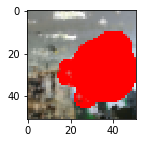

34
[[0.14759879]]
True


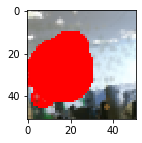

In [159]:
test = sliding_window(20, image)

def confidence_threshold(prediction):
    # Will return true if models confidence is above a threshold value
    threshold = 0.02
    if (prediction > threshold):
        return True
    else:
        return False

print(len(test[:,0,0,0]))

for i in range( len(test[:,0,0,0]) ):
    
    prediction = model.predict( np.array( [test[i,:,:,:],]) )

    if (confidence_threshold(prediction)==False):
        continue
    else:
        print(i)
        print(prediction)
        print(confidence_threshold(prediction))  
        #print( str(prediction).format(1.0e-9) ) # Force scientific notation off
        plt.figure(figsize=(4,2))
        plt.imshow(test[i,:,:,:])    
        plt.show()

In [105]:
preds = model.predict(res)
preds

array([[0.00212543],
       [0.00214901],
       [0.0021649 ],
       ...,
       [0.00026067],
       [0.00026052],
       [0.00027036]], dtype=float32)

In [106]:
np.argmax(preds)

12164

In [ ]:
# Try sliding window and improve in future
# Now ive proven my algorithm can find the point lets write some sliding window thing to break up the image into n smaller ones

y=0
start_x = 0
start_y = 0
window_size = 51
move_size = 20
count=0

while(start_x<160):
    print()
    print('Count: ', count)
    #print('x:{}, y:{}'.format(start_x, start_y))
    end_x = start_x + window_size
    end_y = start_y + window_size

    curr_window = image[start_x:end_x, start_y:end_y]
    #print(curr_window)
    #plt.imshow(curr_window, cmap='gray', vmin=0, vmax=255)
    #plt.show()
    
    try:        
        predict = clf.predict(curr_window.reshape(1,-1)) 
        if (predict==[1.]):
            print('FOUND SPHERE')
            print(start_x, start_y)
            #break
    except:
        print('WRONG SHAPE')

    start_y = start_y + move_size
    if (start_y + window_size > 240):
        # Window has gone off y
        # Restart at y=0 and increase x
        start_y = 0
        start_x = start_x + move_size

    start_y = start_y + move_size
    count = count+1
